In [1]:
## GET DATA
#==============

# Fetch data from below url

# main url
base_url = 'https://www.cs.toronto.edu/~kriz/cifar.html'

# download file name
cifar100_python_version = 'cifar-100-python.tar.gz'

# create final url to download data
download_url = base_url.replace('cifar.html', cifar100_python_version)
download_url

'https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz'

In [1]:
import os
os.getcwd()

'd:\\work\\cifar100classifier-deep-learning\\research'

In [2]:
os.chdir("../")
%pwd

'd:\\work\\cifar100classifier-deep-learning'

In [3]:
import sys

sys.path.append('src')

%pwd

'd:\\work\\cifar100classifier-deep-learning'

In [4]:
from CNNClassifier.constants import *
from CNNClassifier.utils.utilities import read_yaml, create_directory

In [5]:
def download_file(download_url, outfile_path):
    try:
        import requests
        response = requests.get(download_url, stream=True)
        if response.status_code == 200:
            with open(outfile_path, 'wb') as f:
                f.write(response.raw.read())
    except:
        import wget
        wget.download(download_url, out=outfile_path)
    return

In [6]:
# download data
config = read_yaml(CONFIG_FILE_PATH)

create_directory([config.data_ingestion.root_dir])

outfile_path = config.data_ingestion.local_data_file

download_file(download_url, outfile_path)

[2023-10-20 15:13:23,622: INFO: utilities]: yaml file: configs\config.yaml loaded successfully
[2023-10-20 15:13:23,625: INFO: utilities]: create directory at: artifacts/data_ingestion


In [7]:
def unzip_targzfile(targzfile, outfolder=None):
    import tarfile
    # open file
    with tarfile.open(targzfile) as f:
        print(f.getnames())
        # extract files
        f.extractall(outfolder)
    return

In [8]:
# unzip downloaded file
unzip_targzfile(outfile_path, outfolder=config.data_ingestion.root_dir)

['cifar-100-python', 'cifar-100-python/file.txt~', 'cifar-100-python/train', 'cifar-100-python/test', 'cifar-100-python/meta']


In [9]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [10]:
# read train and test file (pickle)

train_set = unpickle(os.path.join(config.data_ingestion.root_dir, 'cifar-100-python/train'))
test_set = unpickle(os.path.join(config.data_ingestion.root_dir, 'cifar-100-python/test'))

print(type(train_set))
print(type(test_set))

<class 'dict'>
<class 'dict'>


In [11]:
# check data elements
print(train_set.keys())
print(test_set.keys())

dict_keys(['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data'])
dict_keys(['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data'])


In [12]:
# check type of each data element
for item in train_set:
    print(item, type(train_set[item]))

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


In [13]:
# check data and labels
print("Labels:", set(train_set['fine_labels']))

Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}


In [14]:
train_data = train_set['data']
train_data

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       ...,
       [248, 240, 236, ..., 180, 174, 205],
       [156, 151, 151, ..., 114, 107, 126],
       [ 31,  30,  31, ...,  72,  69,  67]], dtype=uint8)

In [15]:
# check shape of train data
train_data.shape

(50000, 3072)

In [16]:
# Load meta file
meta_data = unpickle(os.path.join(config.data_ingestion.root_dir, 'cifar-100-python/meta'))
print(type(meta_data))
print(meta_data.keys())

<class 'dict'>
dict_keys(['fine_label_names', 'coarse_label_names'])


In [17]:
print("Label Names:", meta_data['fine_label_names'] )

Label Names: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', '

In [18]:
# Reshape a single image
image = train_set['data'][0]
image = image.reshape(3, 32, 32)
print(image.shape)

(3, 32, 32)


In [19]:
# transpose the image
image = image.transpose(1, 2, 0)
print(image.shape)

(32, 32, 3)


In [20]:
# Reshape and transpose CIFAR-100 Dataset
train_set_trans = train_set['data']
train_set_trans = train_set_trans.reshape(len(train_set_trans), 3, 32, 32)
train_set_trans = train_set_trans.transpose(0, 2, 3, 1)
train_set_trans.shape

(50000, 32, 32, 3)

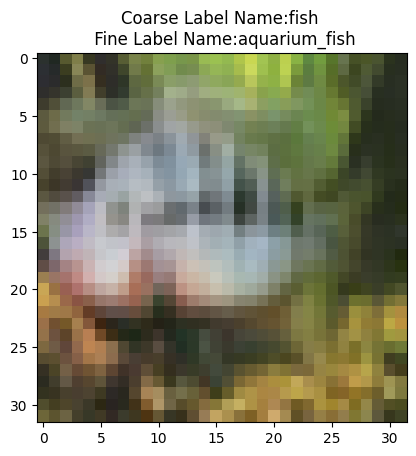

In [21]:
# Visualizing an image from CIFAR-100 dataset
import matplotlib.pyplot as plt

# take 5th image from training data
image = train_set['data'][4]
image = image.reshape(3, 32, 32).transpose(1, 2, 0)
c_label = train_set['coarse_labels'][4]
f_label = train_set['fine_labels'][4]
coarse_name = meta_data['coarse_label_names'][c_label]
fine_name = meta_data['fine_label_names'][f_label]

# plot
plt.imshow(image)
plt.title("Coarse Label Name:{} \n Fine Label Name:{}".format(coarse_name, fine_name))
plt.show()

In [22]:
import numpy as np

def display_image(data, coarse_label, fine_label, c_labels, f_labels, n_sample=12):
    plt.subplots(figsize=(10, 10)) 
    for i in range(n_sample): 
        plt.subplot(3, 4, i+1) 
        k = np.random.randint(0, data.shape[0])
        plt.imshow(data[k])
        plt.xticks([])
        plt.yticks([])
        plt.title("{} \n {}".format(coarse_label[c_labels[k]], fine_label[f_labels[k]]))
    plt.tight_layout() 
    plt.show() 

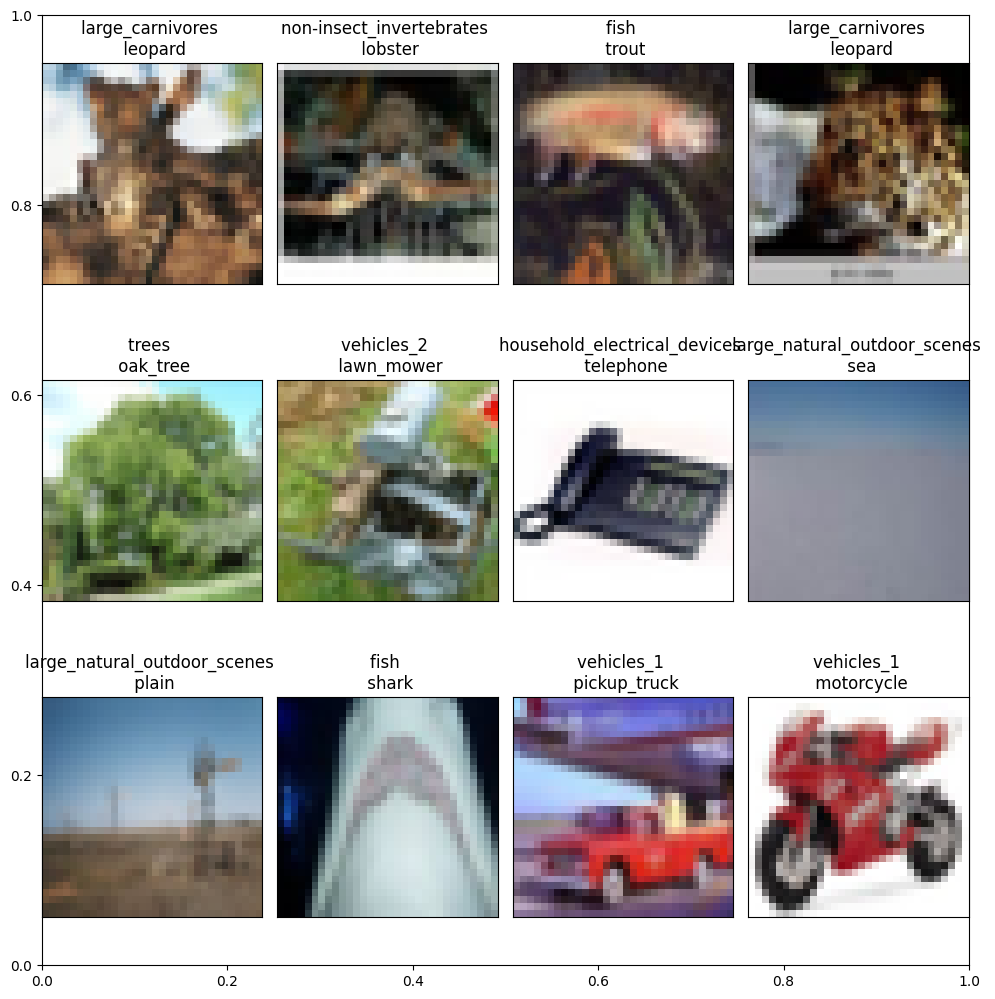

In [23]:
# Visualizing multiple images from CIFAR-100 dataset

# take the images data from training data
images = train_set['data']
n = len(images)
images = images.reshape(n, 3, 32, 32).transpose(0, 2, 3, 1)

# take coarse and fine labels of the images
c_labels = train_set['coarse_labels']
f_labels = train_set['fine_labels']

# take coarse and fine label names of the images
coarse_names = meta_data['coarse_label_names']
fine_names = meta_data['fine_label_names']

display_image(images, coarse_names, fine_names, c_labels, f_labels, n_sample=12)

In [24]:
# create a data records
file_names = train_set['filenames']
fine_labels = train_set['fine_labels']
coarse_labels = train_set['coarse_labels']
coarse_names = meta_data['coarse_label_names']
fine_names = meta_data['fine_label_names']
images = train_set['data']
n_images = len(images)
images = images.reshape(n_images, 3, 32, 32).transpose(0, 2, 3, 1)

In [25]:
from collections import defaultdict

image_dict = defaultdict(list)

for i in range(n_images):
    img = images[i]
    image_dict['file_name'].append(file_names[i])
    image_dict['fine_labels'].append(fine_labels[i])
    image_dict['coarse_labels'].append(coarse_labels[i])
    image_dict['fine_label_names'].append(fine_names[fine_labels[i]])
    image_dict['coarse_label_names'].append(coarse_names[coarse_labels[i]])
    image_dict['image_height'].append(img.shape[0])
    image_dict['image_width'].append(img.shape[1])
    image_dict['image_channel'].append(img.shape[2])
    image_dict['min_pixel'].append(img.min())
    image_dict['max_pixel'].append(img.max())

In [26]:
# dict to dataframe
import pandas as pd

df = pd.DataFrame.from_dict(image_dict)
df

,file_name,fine_labels,coarse_labels,fine_label_names,coarse_label_names,image_height,image_width,image_channel,min_pixel,max_pixel
0,bos_taurus_s_000507.png,19,11,cattle,large_omnivores_and_herbivores,32,32,3,1,255
1,stegosaurus_s_000125.png,29,15,dinosaur,reptiles,32,32,3,37,255
2,mcintosh_s_000643.png,0,4,apple,fruit_and_vegetables,32,32,3,23,252
3,altar_boy_s_001435.png,11,14,boy,people,32,32,3,0,255
4,cichlid_s_000031.png,1,1,aquarium_fish,fish,32,32,3,15,217
...,...,...,...,...,...,...,...,...,...,...
49995,tree_squirrel_s_000969.png,80,16,squirrel,small_mammals,32,32,3,0,246
49996,tiger_beetle_s_000315.png,7,7,beetle,insects,32,32,3,0,240
49997,bear_s_000631.png,3,8,bear,large_carnivores,32,32,3,3,248
49998,beetle_s_000411.png,7,7,beetle,insects,32,32,3,7,186


In [27]:
# save the result for EDA analysis
df.to_csv(os.path.join(config.data_ingestion.root_dir, 'cifar100_trainset_info.csv'), index=False)

In [28]:
## EDA ANALYSIS
#==========================

### Objective: - Image Classification with CIFAR 100

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. 

The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

The dataset is not direct images. Please decode it using your own techniques.
[Dataset Link](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)


`Task`: - Create a Web Application using Flask. Use the end user should be able to upload an image and get results with the prediction score.

In [29]:
from CNNClassifier.constants import *
from CNNClassifier.utils.utilities import read_yaml

config = read_yaml(CONFIG_FILE_PATH)

df = pd.read_csv(os.path.join(config.data_ingestion.root_dir, 'cifar100_trainset_info.csv'))
df.head()

[2023-10-20 15:21:12,100: INFO: utilities]: yaml file: configs\config.yaml loaded successfully


,file_name,fine_labels,coarse_labels,fine_label_names,coarse_label_names,image_height,image_width,image_channel,min_pixel,max_pixel
0,bos_taurus_s_000507.png,19,11,cattle,large_omnivores_and_herbivores,32,32,3,1,255
1,stegosaurus_s_000125.png,29,15,dinosaur,reptiles,32,32,3,37,255
2,mcintosh_s_000643.png,0,4,apple,fruit_and_vegetables,32,32,3,23,252
3,altar_boy_s_001435.png,11,14,boy,people,32,32,3,0,255
4,cichlid_s_000031.png,1,1,aquarium_fish,fish,32,32,3,15,217


In [30]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   file_name           50000 non-null  object
 1   fine_labels         50000 non-null  int64 
 2   coarse_labels       50000 non-null  int64 
 3   fine_label_names    50000 non-null  object
 4   coarse_label_names  50000 non-null  object
 5   image_height        50000 non-null  int64 
 6   image_width         50000 non-null  int64 
 7   image_channel       50000 non-null  int64 
 8   min_pixel           50000 non-null  int64 
 9   max_pixel           50000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 3.8+ MB


In [31]:
# check for duplicated records
df.duplicated().sum()

0

In [32]:
# segregate numerical and categorical columns
numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['fine_labels', 'coarse_labels', 'image_height', 'image_width',
       'image_channel', 'min_pixel', 'max_pixel'],
      dtype='object')
Categorical Columns: Index(['file_name', 'fine_label_names', 'coarse_label_names'], dtype='object')


In [33]:
# check unique/duplicate names and records
for cols in df.columns.tolist():
    print(f'variable name: {cols}, total records: {len(df[cols])}, unique records: {len(df[cols].unique())}')

variable name: file_name, total records: 50000, unique records: 49999
variable name: fine_labels, total records: 50000, unique records: 100
variable name: coarse_labels, total records: 50000, unique records: 20
variable name: fine_label_names, total records: 50000, unique records: 100
variable name: coarse_label_names, total records: 50000, unique records: 20
variable name: image_height, total records: 50000, unique records: 1
variable name: image_width, total records: 50000, unique records: 1
variable name: image_channel, total records: 50000, unique records: 1
variable name: min_pixel, total records: 50000, unique records: 171
variable name: max_pixel, total records: 50000, unique records: 153


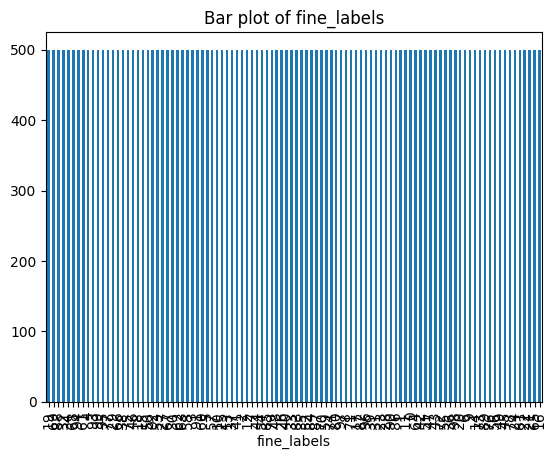

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df['fine_labels'].value_counts().plot(kind='bar')
plt.title("Bar plot of fine_labels")
plt.show()

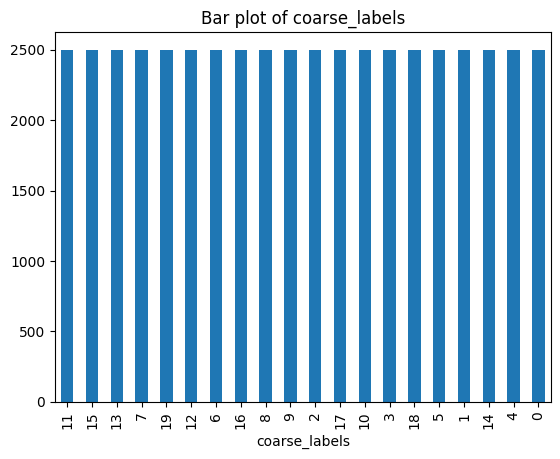

In [35]:
df['coarse_labels'].value_counts().plot(kind='bar')
plt.title("Bar plot of coarse_labels")
plt.show()

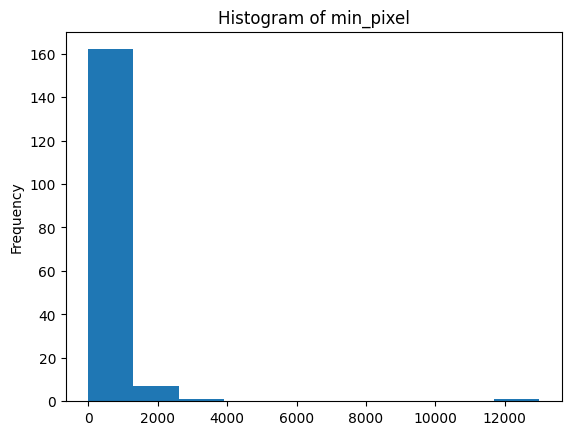

In [36]:
df['min_pixel'].value_counts().plot(kind='hist')
plt.title("Histogram of min_pixel")
plt.show()

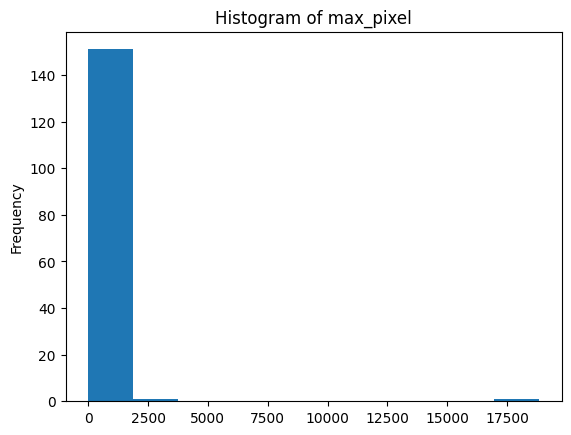

In [37]:
df['max_pixel'].value_counts().plot(kind='hist')
plt.title("Histogram of max_pixel")
plt.show()

In [38]:
df['fine_label_names'][df['fine_labels']==93].values[0]

'turtle'

In [39]:
# Viewing sampling images
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def display_image(df, data, labels, n_sample=12): 
    plt.subplots(figsize=(10, 10)) 
    for i in range(n_sample): 
        plt.subplot(3, 4, i+1) 
        k = np.random.randint(0, data.shape[0])
        label_id = labels[k]
        label_name = df['fine_label_names'][df['fine_labels']==label_id[0]].values[0]
        plt.title(label_name) 
        plt.imshow(data[k])
    plt.tight_layout() 
    plt.show()

# the cifar100 dataset also available in keras
cifar100data = tf.keras.datasets.cifar100
# train-test split
(x_train, y_train), (x_test, y_test) = cifar100data.load_data(label_mode="fine")

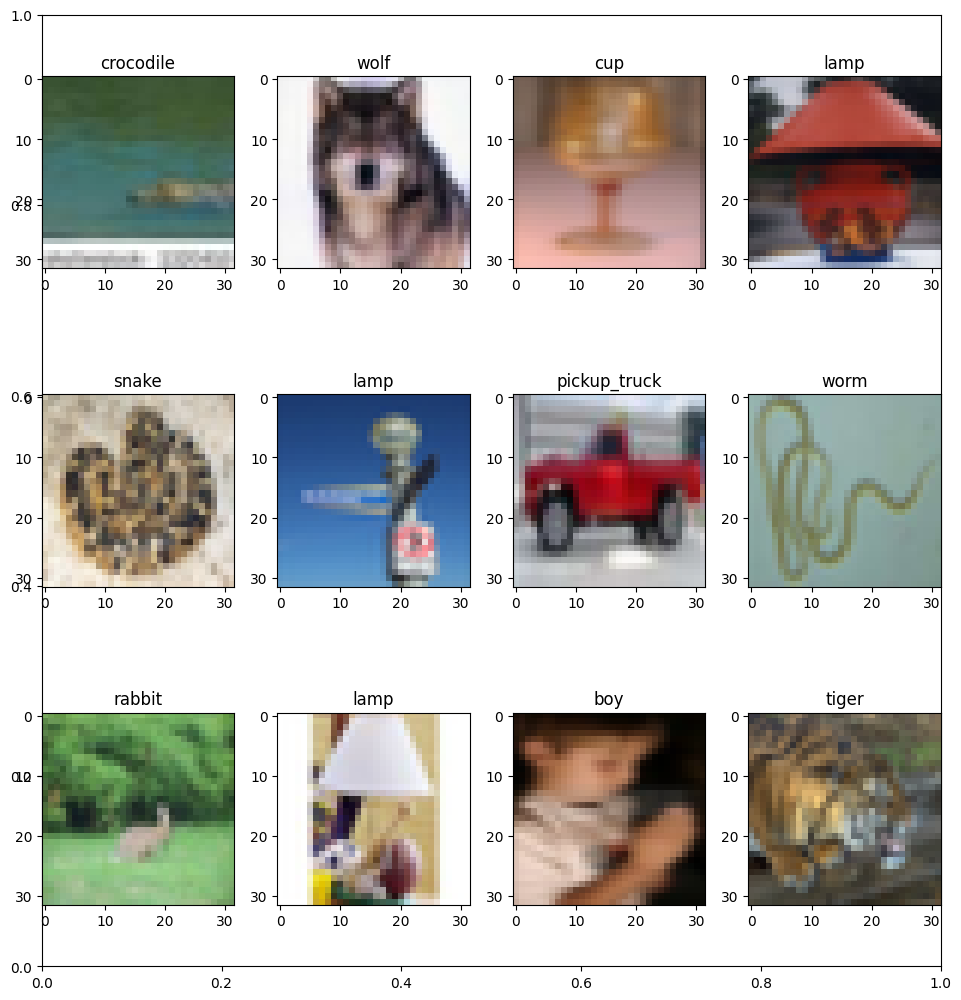

In [40]:
# display training sample images
display_image(df, x_train, y_train)

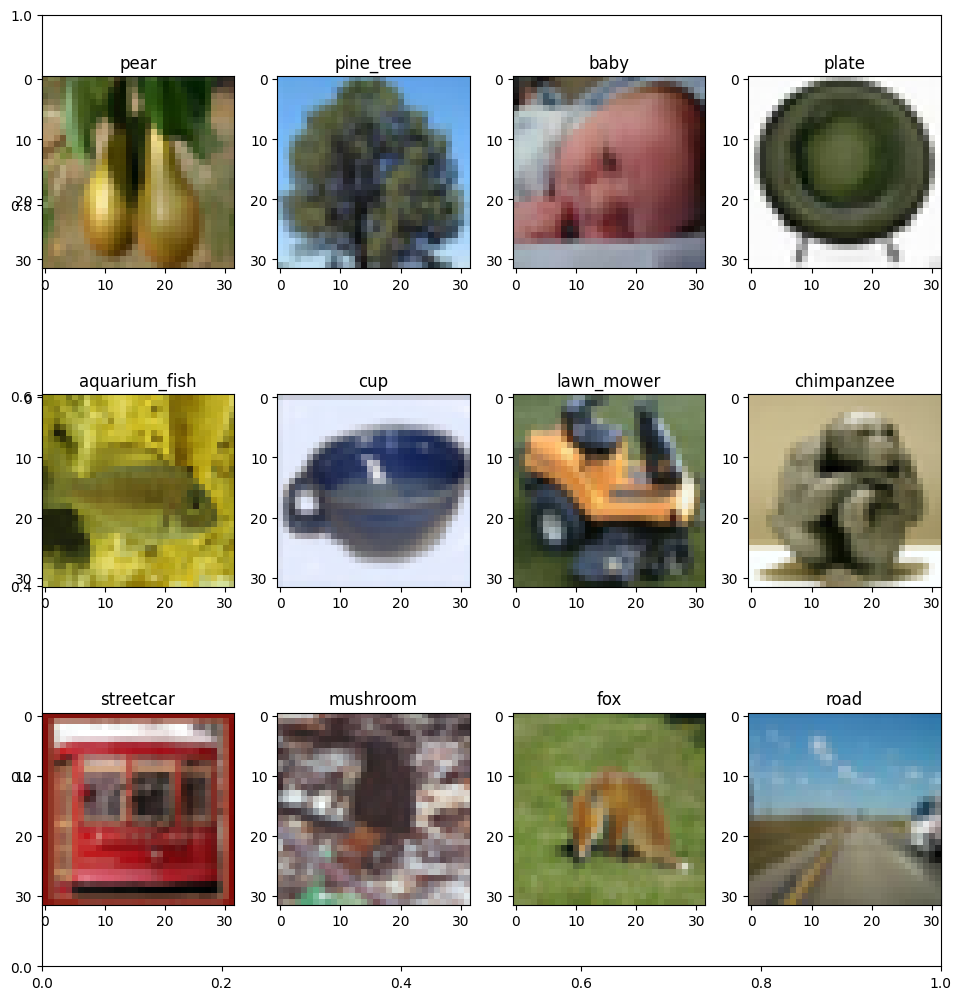

In [41]:
# display test sample images
display_image(df, x_test, y_test)

In [42]:
## PREPARE MODEL FROM SCRATCH
#==============================

# import modules
import os
import tensorflow as tf
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [43]:
from CNNClassifier.constants import *
from CNNClassifier.utils.utilities import read_yaml

config = read_yaml(CONFIG_FILE_PATH)

# read labels
df = pd.read_csv(os.path.join(config.data_ingestion.root_dir, 'cifar100_trainset_info.csv'))
df.head()

[2023-10-20 15:24:37,041: INFO: utilities]: yaml file: configs\config.yaml loaded successfully


,file_name,fine_labels,coarse_labels,fine_label_names,coarse_label_names,image_height,image_width,image_channel,min_pixel,max_pixel
0,bos_taurus_s_000507.png,19,11,cattle,large_omnivores_and_herbivores,32,32,3,1,255
1,stegosaurus_s_000125.png,29,15,dinosaur,reptiles,32,32,3,37,255
2,mcintosh_s_000643.png,0,4,apple,fruit_and_vegetables,32,32,3,23,252
3,altar_boy_s_001435.png,11,14,boy,people,32,32,3,0,255
4,cichlid_s_000031.png,1,1,aquarium_fish,fish,32,32,3,15,217


In [44]:
# the cifar100 dataset also available in keras
cifar100data = tf.keras.datasets.cifar100

# train-test split
(x_train, y_train), (x_test, y_test) = cifar100data.load_data(label_mode="fine")

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [45]:
# check max value
print(x_train.max(), x_test.max())

255 255


In [46]:
# normalize data
x_train = x_train/255
x_test = x_test/255

# transform label to categorical
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 100) (10000, 100)


In [47]:
model = tf.keras.Sequential(
    [
        # convolutional layer
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),
        # flattening
        tf.keras.layers.Flatten(),
        # fully connected layers
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(100, activation='softmax')
    ]
)

In [48]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [49]:
# print summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [50]:
# fit the model
hist = model.fit(x_train, y_train,  
                 epochs=25, 
                 batch_size=64, 
                 validation_data=(x_test, y_test),
                 verbose=1
                 )

Epoch 1/25
782/782 [==============================] - 304s 381ms/step - loss: 4.0452 - accuracy: 0.0868 - val_loss: 3.5486 - val_accuracy: 0.1561
Epoch 2/25
782/782 [==============================] - 329s 421ms/step - loss: 3.3797 - accuracy: 0.1819 - val_loss: 3.1182 - val_accuracy: 0.2335
Epoch 3/25
782/782 [==============================] - 352s 450ms/step - loss: 2.9900 - accuracy: 0.2472 - val_loss: 2.8932 - val_accuracy: 0.2868
Epoch 4/25
782/782 [==============================] - 361s 461ms/step - loss: 2.6991 - accuracy: 0.3044 - val_loss: 2.3758 - val_accuracy: 0.3755
Epoch 5/25
782/782 [==============================] - 346s 443ms/step - loss: 2.4832 - accuracy: 0.3526 - val_loss: 2.4178 - val_accuracy: 0.3756
Epoch 6/25
782/782 [==============================] - 359s 459ms/step - loss: 2.3117 - accuracy: 0.3860 - val_loss: 2.1954 - val_accuracy: 0.4189
Epoch 7/25
782/782 [==============================] - 351s 449ms/step - loss: 2.1561 - accuracy: 0.4216 - val_loss: 2.0768 -

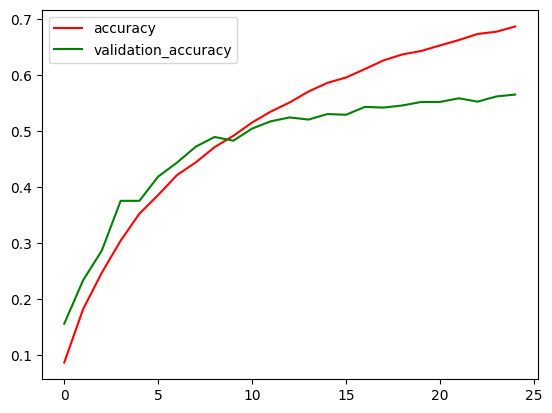

In [51]:
# plot accuracy per iteration
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='accuracy', color='red')
plt.plot(hist.history['val_accuracy'], label='validation_accuracy', color='green')
plt.legend()

In [52]:
# prediction
prediction = model.evaluate(x_test, y_test)
print(f'Test Accuracy : {prediction[1] * 100:.2f}%')

313/313 [==============================] - 13s 40ms/step - loss: 1.6661 - accuracy: 0.5654
Test Accuracy : 56.54%


In [ ]:
# USE VGG16 PRETRAINED MODEL
#===============================
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

def create_base_model(input_shape, n_classes, optimizer='adam', fine_tune=0):
    # Compiles a model integrated with VGG16 pretrained layers
    # input_shape: tuple - the shape of input images (width, height, channels)
    # n_classes: int - number of classes for the output layer
    # optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    # fine_tune: int - The number of pre-trained layers to unfreeze. If set to 0, all pretrained layers will freeze during training
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
from CNNClassifier.config.configuration import ConfigurationManager
import pickle
import tensorflow as tf


config2 = ConfigurationManager()
config3 = config2.get_training_config()

print(config3.num_classes)
print(config3.trainset_file)

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

def extract_data(dicts, num_classes):
    images = dicts['data']
    n = len(images)
    images = images.reshape(n, 3, 32, 32).transpose(0, 2, 3, 1)
    # take coarse and fine labels of the images
    c_labels = dicts['coarse_labels']
    f_labels = dicts['fine_labels']
    # transform label to categorical
    c_labels = tf.keras.utils.to_categorical(c_labels, num_classes)
    f_labels = tf.keras.utils.to_categorical(f_labels, num_classes)
    # normalize data
    images = images/255
    return images, f_labels, c_labels


train_set = unpickle(os.path.join(config3.training_data, config3.trainset_file))
test_set = unpickle(os.path.join(config3.training_data, config3.testset_file))
x_train, y_train, _ = extract_data(train_set, config3.num_classes)
x_test, y_test, _ = extract_data(test_set, config3.num_classes)


# Keras’s ImageDataGenerator class provide three different functions to loads the image dataset in memory and generates batches of augmented data. These three functions are:
# 1) flow()
# 2) flow_from_directory()
# 3) flow_from_dataframe()

is_augmentation = False

if is_augmentation:
    train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest",
        rescale = 1.0/255,
        validation_split=0.20)
else:
    train_datagen = ImageDataGenerator(
        rescale = 1.0/255,
        validation_split=0.20
    )

test_datagen = ImageDataGenerator()


batch_size = 64
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size, subset='training', shuffle=False)
valid_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size, subset='validation', shuffle=False)
test_generator = test_datagen.flow(x_test, batch_size=1)

config4 = config2.get_prepare_callback_config()
config4.checkpoint_model_filepath

In [ ]:
# ! pip install livelossplot
from livelossplot.inputs.keras import PlotLossesCallback

plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath=config4.checkpoint_model_filepath, save_best_only=True, verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode='min')


input_shape = (32, 32, 3)
n_classes = 100
batch_size = 64
optim_1 = Adam(learning_rate=0.001)

steps_per_epoch = (len(x_train)*0.8) // batch_size
validation_steps = (len(x_train)*0.2) // batch_size

In [ ]:
# Training Without Fine-Tuning
model = create_base_model(input_shape, n_classes, optimizer=optim_1, fine_tune=0)

In [ ]:
vgg_history = model.fit(
    train_generator, 
    steps_per_epoch=steps_per_epoch, 
    epochs=5, 
    validation_data=valid_generator, 
    validation_steps=validation_steps, 
    callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
    verbose=1
    )

In [ ]:
# Generate predictions
model = create_base_model(input_shape, n_classes, optimizer=optim_1, fine_tune=0)
model.load_weights(config4.checkpoint_model_filepath)  # initialize the best trained weights

vgg_preds = model.predict(test_generator)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

print(vgg_pred_classes)

In [ ]:
from sklearn.metrics import accuracy_score

true_classes = test_set['fine_labels']
vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc))

In [ ]:
# Using Pre-trained Layers for Fine-Tuning
train_generator.reset()
valid_generator.reset()
test_generator.reset()

# Use a smaller learning rate
optim_2 = Adam(lr=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
vgg_model = create_base_model(input_shape, n_classes, optim_2, fine_tune=2)

plot_loss_2 = PlotLossesCallback()


In [ ]:
# Retrain model with fine-tuning
vgg_history2 = vgg_model.fit(
    train_generator,
    batch_size=64,
    epochs=5,
    validation_data=valid_generator,
    steps_per_epoch=steps_per_epoch, 
    validation_steps=validation_steps,
    callbacks=[tl_checkpoint_1, early_stop, plot_loss_2],
    verbose=1
)